In [1]:
import cv2
from darkflow.net.build import TFNet
aimport matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/home/ryan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


** prepping the model**

Using YOLO v2 from darknet
https://pjreddie.com/darknet/yolov2/

threshold values set low. model is only trained with roughly 110 images per number and through 73 epochs at this weighting

In [101]:
options = {
    'model': 'cfg/tiny-yolo-voc-9c.cfg', #model
    'load': 4625, #weights
    'threshold': 0.075
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-9c.cfg
Loading None ...
Finished in 6.175041198730469e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13,

## Testing on a New Image

This below image (snell.jpg) was not in the models training data
it correctly identifies the one number on the jersey.

There are other testing images in the directory for demonstration.
The label text sizing is hardcoded at the moment and does not fit well with all image dimensions. Could be made dynamic in future.

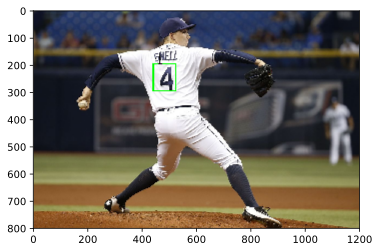

In [114]:
img = cv2.imread('snell.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)

tl = (result[0]['topleft']['x'],result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'],result[0]['bottomright']['y'])
label = result[0]['label']

#uncomment this for 2 numbers, etc...
#tl1 = (result[1]['topleft']['x'],result[1]['topleft']['y'])
#br1 = (result[1]['bottomright']['x'],result[1]['bottomright']['y'])
#label1 = result[1]['label']


img = cv2.rectangle(img,tl,br,(0,255,0),4)
img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,2,(0,0,0),1)
#uncomment this for 2 numbers, etc...
#img = cv2.rectangle(img,tl1,br1,(0,255,0),4)
#img = cv2.putText(img,label1,tl1,cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
plt.imshow(img)
plt.show()
#cv2.imwrite('number.snell.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

## Now lets try this on two jerseys

load in a new testing image with two numbers, both will be detected by the model

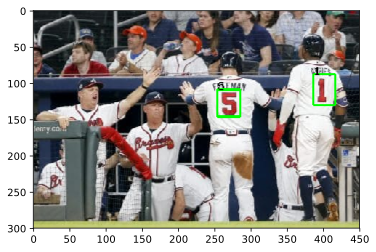

In [117]:
img = cv2.imread('1and5.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)
result

tl = (result[0]['topleft']['x'],result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'],result[0]['bottomright']['y'])
label = result[0]['label']

tl1 = (result[1]['topleft']['x'],result[1]['topleft']['y'])
br1 = (result[1]['bottomright']['x'],result[1]['bottomright']['y'])
label1 = result[1]['label']


img = cv2.rectangle(img,tl,br,(0,255,0),2)
img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
img = cv2.rectangle(img,tl1,br1,(0,255,0),2)
img = cv2.putText(img,label1,tl1,cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),1)
plt.imshow(img)
plt.show()
#cv2.imwrite('number.1and5.jpg',cv2.cvtColor(img, cv2.COLOR_RGB2BGR))